In [1]:
# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [3]:
#get the data

In [4]:
features_data = pd.read_csv('C:/Users/intel/Desktop/Mtech_Proj/Digital twin_29 Jan 2021/Low_features_digitalTwin_fault.csv',
                            index_col=0)

In [5]:
# Import StandardScaler from Scikit learn

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(features_data.drop('fault_Class',axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(features_data.drop('fault_Class',axis=1))

In [9]:
features_data_feat = pd.DataFrame(scaled_features,columns=features_data.columns[:-1])
features_data_feat.head()

,x_Mean,x_Min,x_Kurtosis,x_Crest_Factor,x_Skewness,x_Form_Factor
0,-0.738998,-0.029952,0.889996,1.151179,-0.021754,-0.776634
1,-0.736102,-0.421480,1.093803,1.050243,-0.306858,-0.844986
2,-0.745370,-0.604849,1.143241,0.821641,0.003941,-0.691700
3,-0.722103,-0.107594,1.108033,0.940822,-0.019932,-1.211431
4,-0.749948,-0.236452,0.740891,0.867706,-0.049685,-0.619708


In [10]:
# Splitting of the data

In [11]:
from sklearn.model_selection import train_test_split
X = features_data_feat#or could also be scaled_features
y = features_data['fault_Class']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [12]:
# Using KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
start = time.time()
knn.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.03126263618469238s


In [14]:
# Predictions and Evaluations

In [15]:
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

          C1       0.72      0.70      0.71       536
          C2       1.00      1.00      1.00       523
          C3       0.71      0.73      0.72       527
          C4       1.00      1.00      1.00       536
          C5       1.00      1.00      1.00       518

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640

[[376   0 160   0   0]
 [  0 523   0   0   0]
 [143   0 384   0   0]
 [  0   0   0 536   0]
 [  0   0   0   0 518]]


In [16]:
# Choosing a K Value

Text(0, 0.5, 'Error Rate')

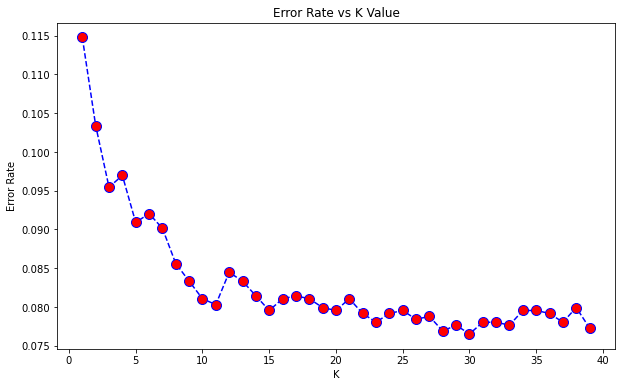

In [17]:
error_rate = []
for i in range(1,40):##for all K values from 1 to 40
   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='Blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value' )
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
knn = KNeighborsClassifier(n_neighbors=15)

start = time.time()
knn.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")


pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Training time: 0.0156252384185791s
[[430   1 105   0   0]
 [  0 523   0   0   0]
 [104   0 423   0   0]
 [  0   0   0 536   0]
 [  0   0   0   0 518]]


              precision    recall  f1-score   support

          C1       0.81      0.80      0.80       536
          C2       1.00      1.00      1.00       523
          C3       0.80      0.80      0.80       527
          C4       1.00      1.00      1.00       536
          C5       1.00      1.00      1.00       518

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640

